In [26]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC # "Support vector classifier"


## Open MNIST data and create a subset with desired digits

<font color=red>Change the code below to select a different subset </font>

In [27]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

with open('temp.pickle', 'wb') as handle:
    pickle.dump([X, y], handle)

In [28]:

# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    X, y = pickle.load(handle)
    
digits = (0,1)
indices = y==digits[0]
for i in digits:
    indices = indices | (y==i)

Xnew = X[indices]
ynew = y[indices]
#ynew = 0*digit1index[index]+digit2index[index]
Nfeatures = np.size(Xnew,1)
Nsamples = np.size(Xnew,0)

print(Xnew.shape)

X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) # 0.25 x 0.8 = 0.2
'''
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.3, random_state=1)

 
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2
'''

Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(14780, 784)
(10346, 784) (1478, 784) (2956, 784)
(10346,) (1478,) (2956,)


Found 76 support vectors!


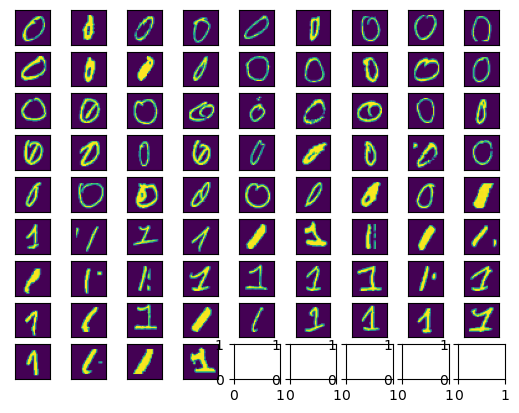

In [33]:
# Plotting the support vectors
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
sv = clf.support_vectors_
print(f"Found {len(sv)} support vectors!")

dim = math.ceil(len(sv) ** (1/2))
fig, axs = plt.subplots(dim, dim)
for i, grid in enumerate(sv):
    row = math.floor(i/dim)
    col = i % dim
    axs[row, col].imshow(np.reshape(grid,(28,28)))
    axs[row,col].get_xaxis().set_visible(False)
    axs[row,col].get_yaxis().set_visible(False)


In [24]:
# Plotting the dual coefficients
dc = clf.dual_coef_
print(dc.shape)

(1, 76)


In [25]:
clf.decision_function()

TypeError: decision_function() missing 1 required positional argument: 'X'